random forest:

集成算法
- bagging
    - 每一模型相互独立 互相平行

- boosting
    - 取样，建模，取样，建模（根据评估错误更正下一次建模）
- stacking

- bagging
    - criterion
    - max-depth
    - min-samples-leaf
    - min-samples-split
    - max features
    - min-impurity-decrease
    - n-estimators ( number of trees in the forest)
        - n bigger, estimation better
        - once reach to a number of n, the estimation does not change
        - more n-estimators => more memory cost, more calcuation time
        - normal n-estimators =10, new scikit allows 100
        
 * decision tree is often overfitting， in order to solve this problem, should use "max-depth", "min-sample-leaf" and "min-sample-split"

In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
wine.data.shape

(178, 13)

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size =0.3)

In [10]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

In [11]:
print("single tree: {}".format(score_c)
     , "random forest: {}".format(score_r))

single tree: 0.9074074074074074 random forest: 1.0


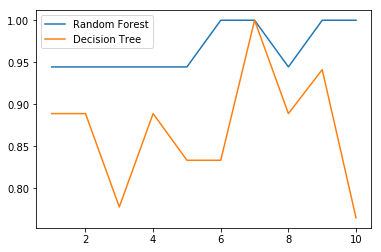

In [12]:
# cross-validation

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label= "Random Forest")
plt.plot(range(1,11), clf_s, label= "Decision Tree")
plt.legend()
plt.show()

由此可见，在经过10次cross validation之后的图中，Random Forest基本上在score（accuracy上）碾压Decision Tree

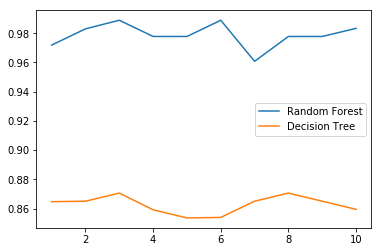

In [16]:
# 查看在10组运行各10次cross—validation之后，画出Random Forest
# 和Decision Tree的accuracy

rfc_1 = []
clf_1 = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_1.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11), rfc_1, label = "Random Forest")
plt.plot(range(1,11), clf_1, label = "Decision Tree")
    
plt.legend()
plt.show()

0.9888888888888889 22


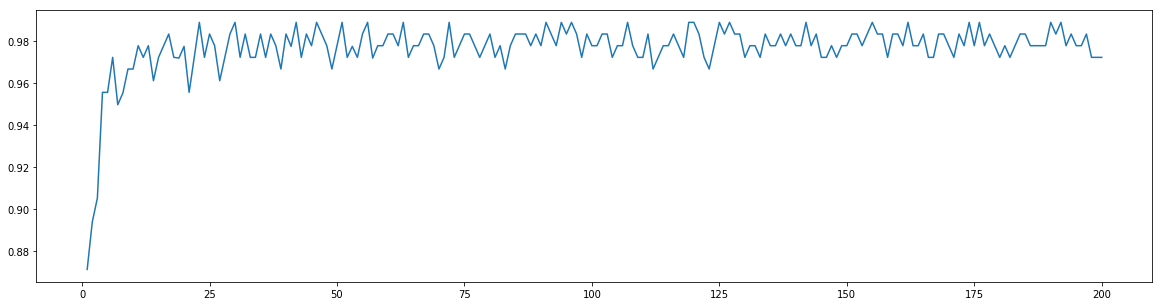

In [19]:
# n-estimator的学习曲线

superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201), superpa)
plt.show()

重要属性和接口

estimators
和
oob_score 袋外等分


与decision tree相同，random forest有四个常用接口：
   apply， fit， predict， score
   加一个
   predict——proba： 每个测试样本对应被分到每一类标签的概率，标签有几个分类就返回几个概率，如果是二分法，则数值大于0.5的被分为1，小于0.5的被分为0。
   
调参的基本思想
- 找目标：为什么要调参，提升准确率？

generalization
- 模型复杂度高 或者太简单 都会让泛化误差很高，我们追求的是位于中间的平均点
- 模型太复杂就会overfitting，模型太简单就会underfitting
- 对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂
- 树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动

最佳模型复杂度：
- 没有overfitting，underfitting 也没有generalization error



In [20]:
# importances etc

rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

rfc.feature_importances_
rfc.apply(Xtest)
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([[0.08, 0.88, 0.04],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.12, 0.88],
       [0.88, 0.12, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.48, 0.52],
       [0.04, 0.  , 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.04, 0.96],
       [0.  , 0.12, 0.88],
       [1.  , 0.  , 0.  ],
       [0.  , 0.88, 0.12],
       [0.04, 0.12, 0.84],
       [0.  , 1.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.12, 0.84, 0.04],
       [0.  , 0.8 , 0.2 ],
       [0.  , 0.92, 0.08],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ],
       [0.24, 0.76, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
 

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
data = load_breast_cancer()

In [23]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
data.data.shape

(569, 30)

In [26]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
rfc = RandomForestClassifier(n_estimators =100, random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


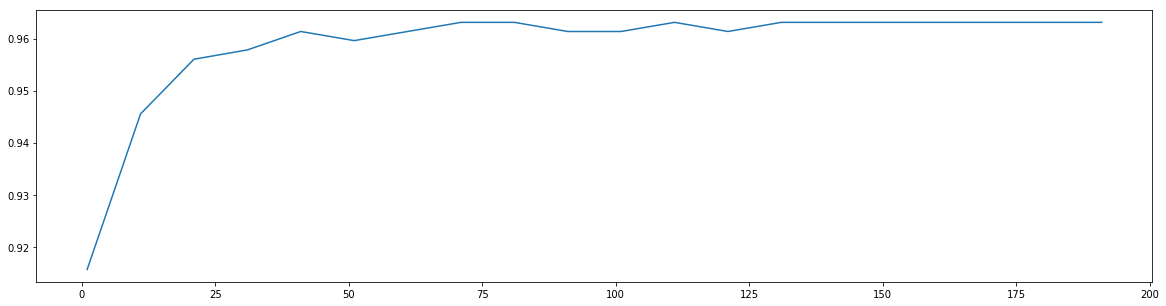

In [31]:
# find the n that best estimate the model
score1 =[]

for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=90)
    score =cross_val_score(rfc, data.data, data.target, cv=10).mean()
    score1.append(score)

print(max(score1),(score1.index(max(score1))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score1)
plt.show()

0.9613721804511279 41


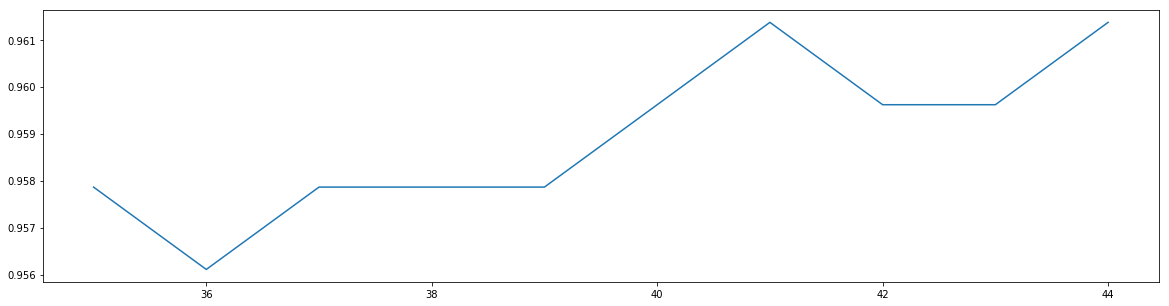

In [32]:
# narrow down to the range of "could be best" n from the n found above

score1 = []

for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data, data.target,cv=10).mean()
    score1.append(score)

print(max(score1),([*range(35,45)][score1.index(max(score1))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),score1)
plt.show()

In [38]:
# changing max_depth parameters

param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=41, random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=41, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
GS.best_params_

{'max_depth': 8}

In [40]:
GS.best_score_

0.9648809523809524

In [41]:
# changing max_features parameters

param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=41, random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=41, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [42]:
GS.best_params_

{'max_features': 7}

In [43]:
GS.best_score_

0.968421052631579

In [44]:
# changing min_samples_leaf
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}

rfc = RandomForestClassifier(n_estimators=41, random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data, data.target)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=41, random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [45]:
GS.best_params_

{'min_samples_leaf': 1}

In [46]:
GS.best_score_

0.9613721804511279

In [50]:
# changing criterion parameter

param_grid = {'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=41, random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)

GS.fit(data.data, data.target)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=41, random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [51]:
GS.best_params_

{'criterion': 'entropy'}

In [52]:
GS.best_score_

0.9666666666666666

In [63]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=41,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9666666666666666

In [59]:
score - score_pre

0.0017857142857141683